# **Taller No. 3: Segmentación por agrupamiento (*clustering*)**

## **Autores**: 
- Vivian Natalia Gómez Cubillos 
- Kelly Katherine Penaranda Rivera

# **Contenido**
3. [**Introducción**](#id1)
3. [**Método**](#id2)
4. [**Código**](#id3)
3. [**Resultados**](#id4)
4. [**Conclusión y discusión**](#id5)


## **1. Introducción**<a name="id1"></a>
## **2. Método**<a name="id2"></a>
## **3. Código**<a name="id3"></a>
## **4. Resultados**<a name="id4"></a>
## **5. Conclusión y discusión**<a name="id5"></a>

In [16]:
import utils.segmentation as seg
import matplotlib.pyplot as plt

In [17]:
url = "https://raw.githubusercontent.com/VivianGomez/t3_segmentation/master/utils/images/2.jpeg"
img = seg.download_image(url)

The shape of the image is: (750, 1125, 3)


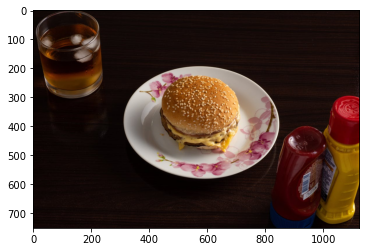

In [18]:
plt.imshow(img)
plt.show()

Coordenadas aleatorias  5 954
Pixel  [22 12 10]
Coordenadas aleatorias  5 997
Pixel  [23 12 10]
Coordenadas aleatorias  721 370
Pixel  [19  8  4]
C  [(22, 12, 10), (23, 12, 10), (19, 8, 4)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5
Iteracion actual -> 6
Iteracion actual -> 7
Iteracion actual -> 8
Iteracion actual -> 9


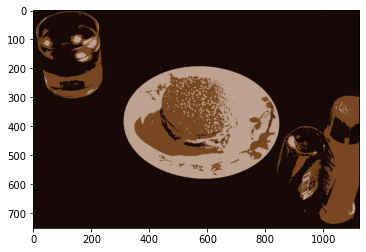

[(120, 71, 34), (189, 162, 144), (23, 9, 7)]

In [19]:
seg.kmeans(3, img, 25, 5, True, [])

C  [(31, 32, 27), (179, 176, 221), (87, 125, 128)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5
Iteracion actual -> 6
Iteracion actual -> 7
Iteracion actual -> 8
Iteracion actual -> 9


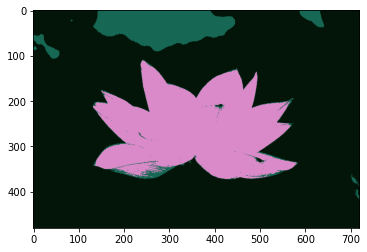

In [12]:
segmented_imgs = seg.kmeans(3, img, 25, 5, False, [(31, 32, 27), (179, 176, 221), (87, 125, 128)])